In [ ]:
EDA : Finding Correlation between the 10 crypto currencies.

In [1]:
from Scrapers.Coinmarketcap import coinmarketcap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import lag_plot

import sklearn as sk
from sklearn import preprocessing as pr
from sklearn.linear_model import LinearRegression
import matplotlib.patches as mpatches
from scipy.signal import correlate
from scipy.stats.mstats import spearmanr

%matplotlib inline


In [2]:
cmk = coinmarketcap.CoinMarketcap()
coin_names = cmk.coin_names()
coin_names[0:10]

['Bitcoin',
 'Ethereum',
 'Ripple',
 'Bitcoin Cash',
 'Litecoin',
 'Cardano',
 'NEO',
 'Stellar',
 'EOS',
 'Dash']

In [3]:
coins = cmk.coins()
start, end = '20180301', '20190301'


In [7]:
crypto = {}

crypto['bitcoin']=coins[0].get_history(start, end)
crypto['ethereum']=coins[1].get_history(start, end)
crypto['ripple']=coins[2].get_history(start, end)
crypto['bitcoin_cash']=coins[3].get_history(start, end)
crypto['litecoin']=coins[4].get_history(start, end)
crypto['cardeno']=coins[5].get_history(start, end)
crypto['neo']=coins[6].get_history(start, end)
crypto['stellar']=coins[7].get_history(start, end)
crypto['eos']=coins[8].get_history(start, end)
crypto['dash']=coins[9].get_history(start, end)
crypto['iota']=coins[10].get_history(start, end)


In [8]:
for coin in crypto:
    for column in crypto[coin].columns:
        if column not in ['Date', 'Close**']:
            crypto[coin] = crypto[coin].drop(column, 1)
    # Make date the datetime type and reindex
    crypto[coin]['Date'] = pd.to_datetime(crypto[coin]['Date'])
    crypto[coin] = crypto[coin].sort_values('Date')
    crypto[coin] = crypto[coin].set_index(crypto[coin]['Date'])
    crypto[coin] = crypto[coin].drop('Date', 1)

In [ ]:
for coin in crypto:
    display(crypto[coin])

In [9]:
for coin in crypto:
    crypto[coin]['CloseDiff'] = crypto[coin]['Close**'].diff().fillna(0)

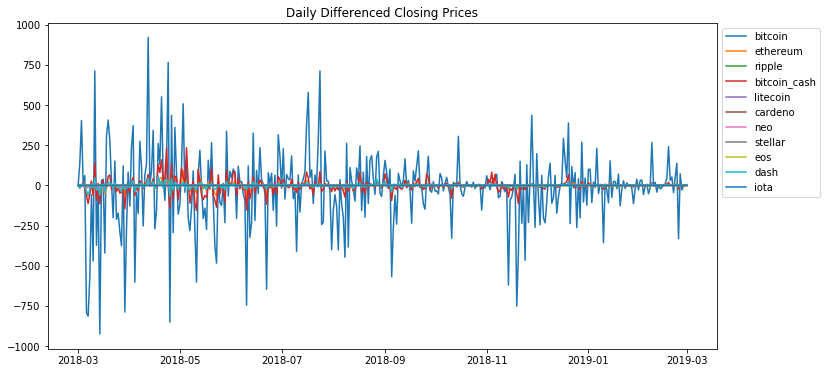

In [28]:

from matplotlib.font_manager import FontProperties
plt.figure(figsize=(12,6))

for coin in crypto:
    plt.plot(crypto[coin]['CloseDiff'], label=coin)
    
plt.legend(loc=0, bbox_to_anchor=(1, 1))
plt.title('Daily Differenced Closing Prices')
plt.show()

#here it can be seen that bitcoin has much larger spikes than any other crypto currency

In [11]:
for coin in crypto:
    crypto[coin]['Close_percent_change'] = crypto[coin]['Close**'].pct_change().fillna(0)

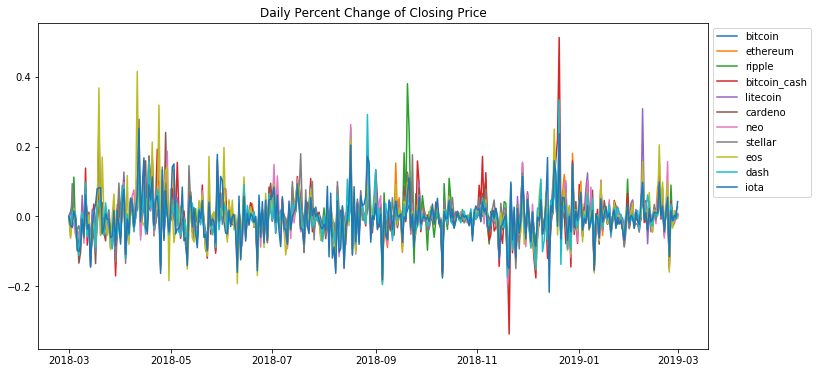

In [27]:
plt.figure(figsize=(12,6))
for coin in crypto:
    plt.plot(crypto[coin]['Close_percent_change'], label=coin)
plt.legend(loc=0, bbox_to_anchor=(1, 1))
plt.title('Daily Percent Change of Closing Price')
plt.show()

#here, analyzing the percentage change on daily basis

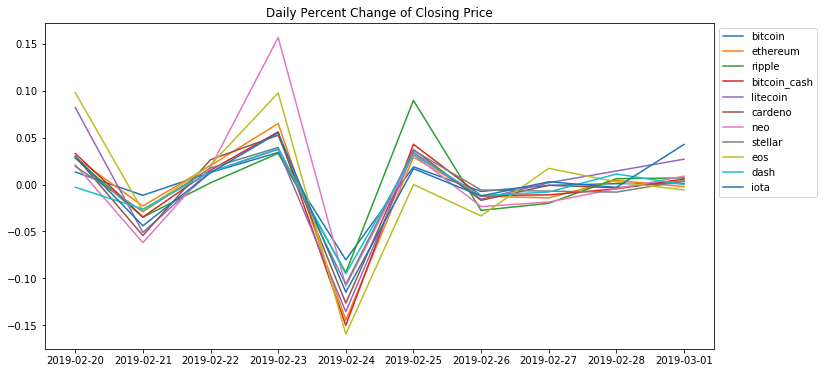

In [26]:
plt.figure(figsize=(12,6))
for coin in crypto:
    plt.plot(crypto[coin]['Close_percent_change'][-10:], label=coin)
plt.legend(loc=0, bbox_to_anchor=(1, 1))
#plt.xticks(range(10), corrDF.columns.values, rotation='vertical')
plt.title('Daily Percent Change of Closing Price')
plt.show()

#plotting correlation of recent ten days to have closer inspection

In [12]:
corrBitcoin = {}
corrDF = pd.DataFrame()

for coin in crypto: 
    corrBitcoin[coin] = correlate(crypto[coin]['Close_percent_change'], crypto['bitcoin']['Close_percent_change'])
    lag = np.argmax(corrBitcoin[coin])
    laggedCoin = np.roll(crypto[coin]['Close_percent_change'], shift=int(np.ceil(lag)))
    corrDF[coin] = laggedCoin
    
    

/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


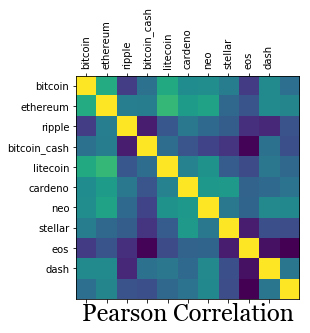

,bitcoin,ethereum,ripple,bitcoin_cash,litecoin,cardeno,neo,stellar,eos,dash,iota
bitcoin,1.000000,0.856015,0.693391,0.765910,0.852756,0.806999,0.808443,0.782559,0.692114,0.804534,0.761904
ethereum,0.856015,1.000000,0.784877,0.784427,0.875003,0.832185,0.841146,0.750525,0.722224,0.802471,0.796435
ripple,0.693391,0.784877,1.000000,0.655046,0.726386,0.775187,0.753829,0.735983,0.675884,0.668730,0.721298
bitcoin_cash,0.765910,0.784427,0.655046,1.000000,0.759487,0.724073,0.701192,0.682537,0.629315,0.766743,0.716416
litecoin,0.852756,0.875003,0.726386,0.759487,1.000000,0.791280,0.815918,0.734138,0.711407,0.774015,0.750045
cardeno,0.806999,0.832185,0.775187,0.724073,0.791280,1.000000,0.824516,0.827524,0.744722,0.753483,0.767933
neo,0.808443,0.841146,0.753829,0.701192,0.815918,0.824516,1.000000,0.775315,0.745738,0.802056,0.800509
stellar,0.782559,0.750525,0.735983,0.682537,0.734138,0.827524,0.775315,1.000000,0.654909,0.717348,0.714518
eos,0.692114,0.722224,0.675884,0.629315,0.711407,0.744722,0.745738,0.654909,1.000000,0.641927,0.625321
dash,0.804534,0.802471,0.668730,0.766743,0.774015,0.753483,0.802056,0.717348,0.641927,1.000000,0.772144


In [30]:

font = {'family': 'Georgia',
        'color':  'black',
        'weight': 'normal',
        'size': 24,
        }


plt.matshow(corrDF.corr(method='pearson'))
plt.xticks(range(10), corrDF.columns.values, rotation='vertical')
plt.yticks(range(10), corrDF.columns.values)
plt.xlabel('Pearson Correlation', fontdict=font)
plt.show()
corrDF.corr(method='pearson')

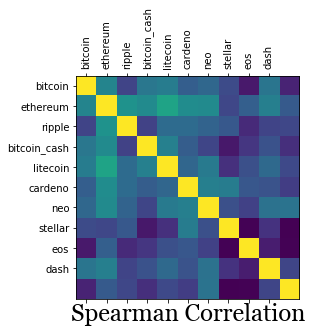

,bitcoin,ethereum,ripple,bitcoin_cash,litecoin,cardeno,neo,stellar,eos,dash,iota
bitcoin,1.000000,0.840785,0.769236,0.825553,0.832111,0.796242,0.806890,0.776079,0.730468,0.823090,0.739211
ethereum,0.840785,1.000000,0.857698,0.848633,0.878512,0.851020,0.848980,0.771854,0.798340,0.835201,0.792411
ripple,0.769236,0.857698,1.000000,0.767514,0.811109,0.811973,0.802184,0.789813,0.744934,0.769860,0.772079
bitcoin_cash,0.825553,0.848633,0.767514,1.000000,0.836412,0.795546,0.771163,0.728884,0.755730,0.782750,0.749399
litecoin,0.832111,0.878512,0.811109,0.836412,1.000000,0.805341,0.828159,0.750326,0.780580,0.809016,0.773964
cardeno,0.796242,0.851020,0.811973,0.795546,0.805341,1.000000,0.835435,0.832384,0.788328,0.784493,0.763241
neo,0.806890,0.848980,0.802184,0.771163,0.828159,0.835435,1.000000,0.781106,0.766028,0.819148,0.820280
stellar,0.776079,0.771854,0.789813,0.728884,0.750326,0.832384,0.781106,1.000000,0.711608,0.752843,0.710117
eos,0.730468,0.798340,0.744934,0.755730,0.780580,0.788328,0.766028,0.711608,1.000000,0.733330,0.711414
dash,0.823090,0.835201,0.769860,0.782750,0.809016,0.784493,0.819148,0.752843,0.733330,1.000000,0.770710


In [15]:
plt.matshow(corrDF.corr(method='spearman'))
plt.xticks(range(10), corrDF.columns.values, rotation='vertical')
plt.yticks(range(10), corrDF.columns.values)
plt.xlabel('Spearman Correlation', fontdict=font)
plt.show()
corrDF.corr(method='spearman')

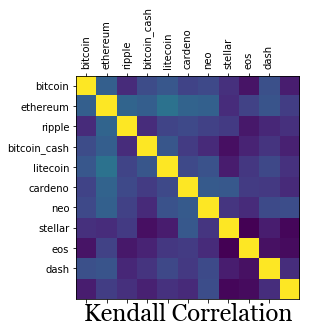

,bitcoin,ethereum,ripple,bitcoin_cash,litecoin,cardeno,neo,stellar,eos,dash,iota
bitcoin,1.000000,0.675086,0.592005,0.643776,0.661801,0.627816,0.637158,0.599461,0.559657,0.648327,0.571396
ethereum,0.675086,1.000000,0.684368,0.674606,0.709729,0.683469,0.677032,0.593103,0.627252,0.655982,0.619089
ripple,0.592005,0.684368,1.000000,0.593712,0.629403,0.637039,0.625540,0.613175,0.564449,0.586135,0.599695
bitcoin_cash,0.643776,0.674606,0.593712,1.000000,0.658717,0.615630,0.590986,0.554637,0.580894,0.603921,0.578434
litecoin,0.661801,0.709729,0.629403,0.658717,1.000000,0.637188,0.652249,0.570267,0.611028,0.635900,0.601881
cardeno,0.627816,0.683469,0.637039,0.615630,0.637188,1.000000,0.666203,0.663657,0.615131,0.611377,0.590142
neo,0.637158,0.677032,0.625540,0.590986,0.652249,0.666203,1.000000,0.606496,0.592664,0.638654,0.645450
stellar,0.599461,0.593103,0.613175,0.554637,0.570267,0.663657,0.606496,1.000000,0.534855,0.572421,0.542140
eos,0.559657,0.627252,0.564449,0.580894,0.611028,0.615131,0.592664,0.534855,1.000000,0.555880,0.549058
dash,0.648327,0.655982,0.586135,0.603921,0.635900,0.611377,0.638654,0.572421,0.555880,1.000000,0.595860


In [16]:
plt.matshow(corrDF.corr(method='kendall'))
plt.xticks(range(10), corrDF.columns.values, rotation='vertical')
plt.yticks(range(10), corrDF.columns.values)
plt.xlabel('Kendall Correlation', fontdict = font)
plt.show()
corrDF.corr(method='kendall')